## Main

In this script, our main goal is to test all models developed in models folder.

In [7]:
import torchvision.transforms as transforms
from utils.Dataset import Dataset  
from models.classifiers import BinaryAlexNet,MultiAlexNet
from utils.ModelTrainer import ModelTrainer
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from tqdm import tqdm
import matplotlib.pyplot as plt


In [8]:
oxford=Dataset('species',227)

Extracting and transforming values from train data:  14%|██████                                     | 827/5920 [00:02<00:17, 297.72it/s]Corrupt JPEG data: premature end of data segment
Extracting and transforming values from train data:  52%|█████████████████████▋                    | 3062/5920 [00:10<00:12, 225.27it/s]Corrupt JPEG data: 245 extraneous bytes before marker 0xd9
Extracting and transforming values from train data: 100%|██████████████████████████████████████████| 5920/5920 [00:20<00:00, 293.79it/s]
Extracting and transforming values from test data: 100%|███████████████████████████████████████████| 1470/1470 [00:04<00:00, 296.43it/s]

Data loaded succesfully!


In [9]:
train_loader = torch.utils.data.DataLoader(oxford.train, 64)
test_loader = torch.utils.data.DataLoader(oxford.test, 100)

In [10]:
iterador =  iter(test_loader) # Un iterador!!
next(iterador)

[tensor([[[[0.8084, 0.8018, 0.8115,  ..., 0.0561, 0.0590, 0.0672],
           [0.8117, 0.8055, 0.8089,  ..., 0.0518, 0.0416, 0.0414],
           [0.8138, 0.8093, 0.8100,  ..., 0.0428, 0.0422, 0.0526],
           ...,
           [0.5465, 0.5515, 0.5588,  ..., 0.5945, 0.5998, 0.6006],
           [0.5562, 0.5624, 0.5608,  ..., 0.5849, 0.5713, 0.5795],
           [0.5495, 0.5537, 0.5553,  ..., 0.5897, 0.5871, 0.5826]],
 
          [[0.7277, 0.7291, 0.7350,  ..., 0.1263, 0.1116, 0.1084],
           [0.7298, 0.7316, 0.7354,  ..., 0.1316, 0.1098, 0.1058],
           [0.7369, 0.7351, 0.7344,  ..., 0.0927, 0.1005, 0.1125],
           ...,
           [0.5269, 0.5325, 0.5392,  ..., 0.5600, 0.5654, 0.5572],
           [0.5366, 0.5432, 0.5412,  ..., 0.5259, 0.5188, 0.5174],
           [0.5314, 0.5356, 0.5371,  ..., 0.5448, 0.5516, 0.5456]],
 
          [[0.5836, 0.5845, 0.5869,  ..., 0.1376, 0.1110, 0.1091],
           [0.5886, 0.5907, 0.5883,  ..., 0.1471, 0.1169, 0.1230],
           [0.5860, 0.58

Trainable Parameters:  54011394


 25%|█████████████████████████▎                                                                           | 1/4 [01:02<03:06, 62.16s/it]


Test set: Average loss: 0.0045, Accuracy: 1284/1470 (87.35%)



 50%|██████████████████████████████████████████████████▌                                                  | 2/4 [02:04<02:04, 62.20s/it]


Test set: Average loss: 0.0042, Accuracy: 1315/1470 (89.46%)



 75%|███████████████████████████████████████████████████████████████████████████▊                         | 3/4 [03:08<01:03, 63.06s/it]


Test set: Average loss: 0.0041, Accuracy: 1328/1470 (90.34%)



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:16<00:00, 64.12s/it]


Test set: Average loss: 0.0041, Accuracy: 1336/1470 (90.88%)



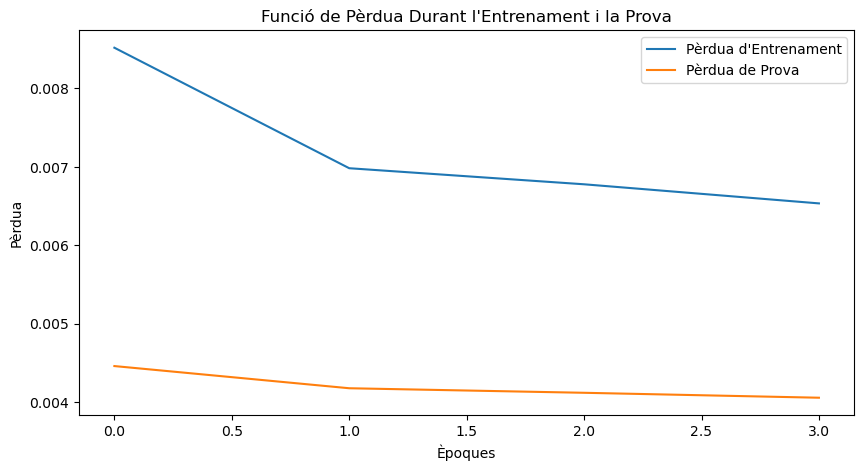

In [25]:
use_cuda = False
torch.manual_seed(33)

if use_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
lr = 1e-1

model = BinaryAlexNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)

trainer = ModelTrainer(train_loader,test_loader,optimizer,F.cross_entropy,4)

train_loss, test_loss = trainer.train_test(model, device)

# Guardem els pesos del model
path_to_save = 'model_weights_Binary_Alex_Net.pth'
torch.save(model.state_dict(), path_to_save)

# Creant el gràfic de pèrdua
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Pèrdua d\'Entrenament')
plt.plot(test_loss, label='Pèrdua de Prova')
plt.title('Funció de Pèrdua Durant l\'Entrenament i la Prova')
plt.xlabel('Èpoques')
plt.ylabel('Pèrdua')
plt.legend()
plt.show()

In [21]:
class AdroBalaNet(nn.Module):
    def __init__(self):
        super(AdroBalaNet, self).__init__()
        
        # Adjust the last convolutional layer to produce a compatible output size
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),
            nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1)),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),
            nn.Flatten()  # Flatten before passing to linear layers
        )
        
        # Define the additional layers for your specific task
        self.classifier = nn.Sequential(
            nn.Linear(in_features=55 * 55 * 16, out_features=512),  # Adjust the input size
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=512, out_features=2, bias=True),
            nn.Softmax(dim=1)
        )


    def forward(self, x):
        x = self.cnn(x)
        x = self.classifier(x)
        return x


In [ ]:
import os
for filename in os.listdir('data/train/'):
    if not filename.endswith('.jpg'):
        print(filename)
